<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

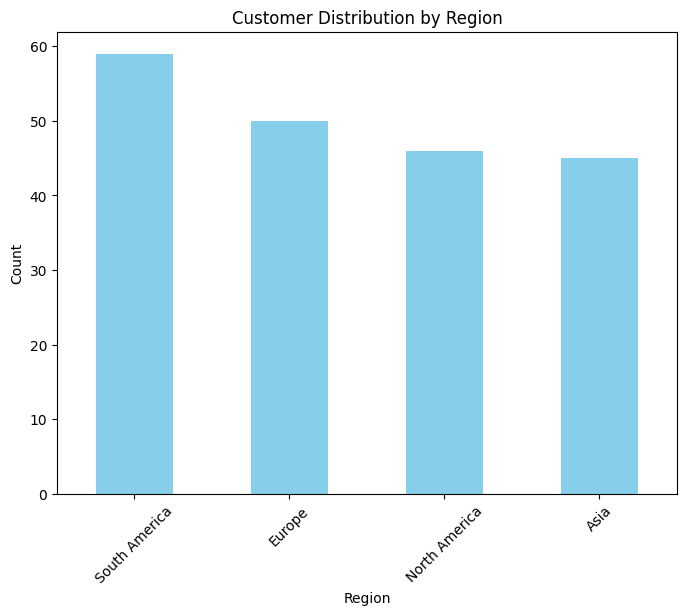

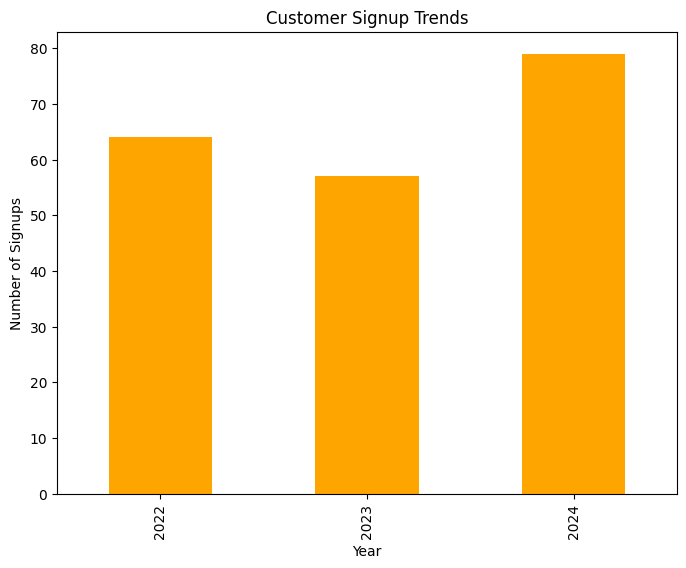

<ipython-input-15-a581e5287fd1>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=products, x='Category', y='Price', palette='Set2')


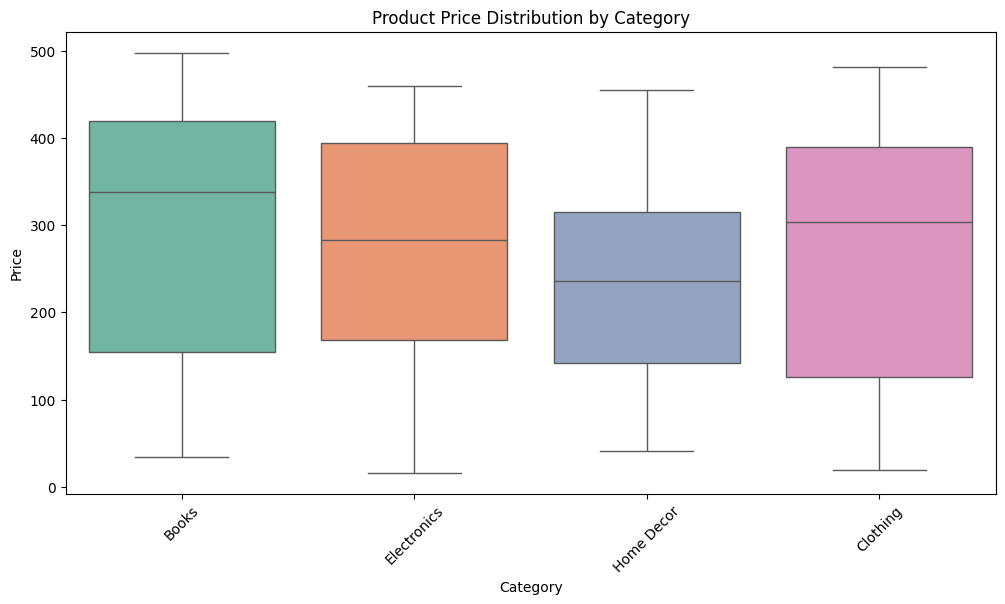

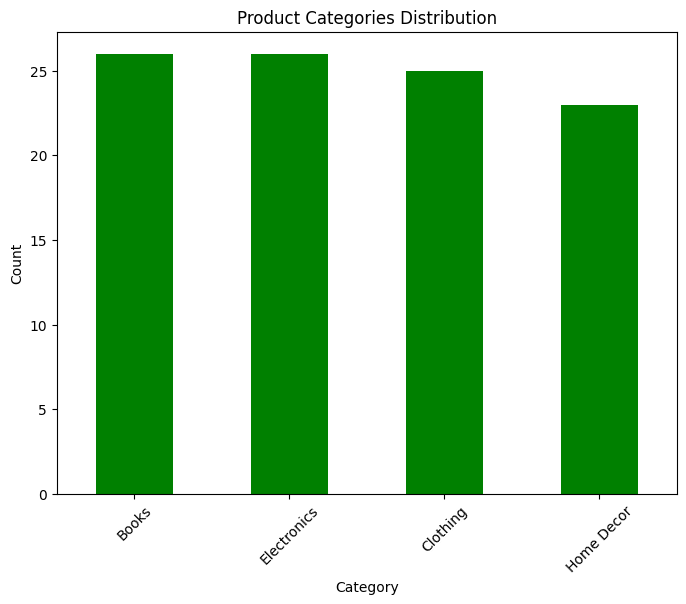

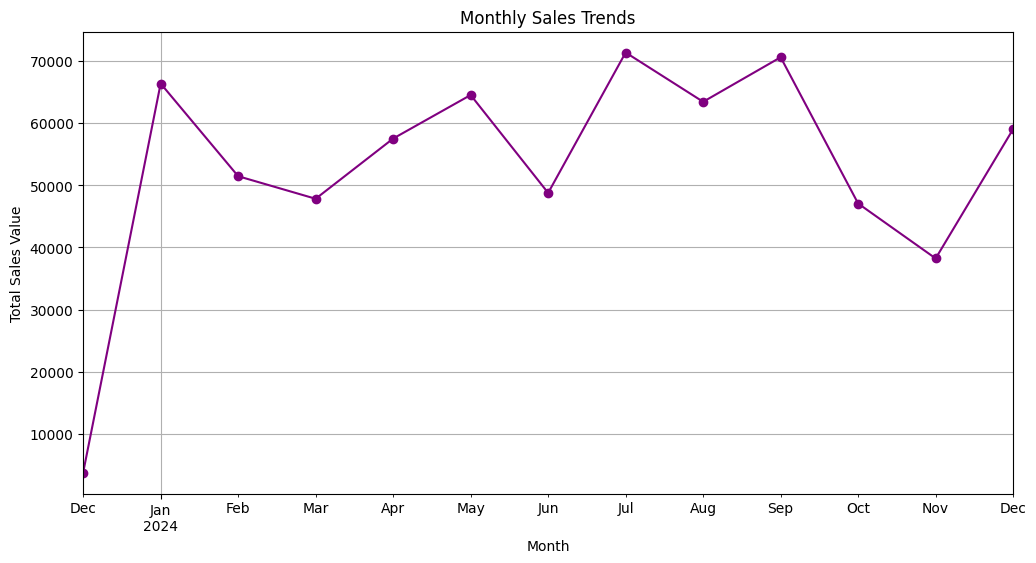

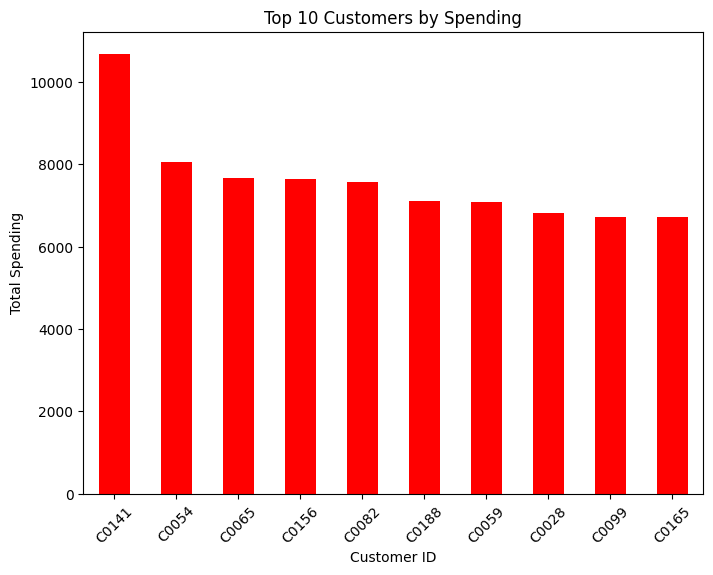

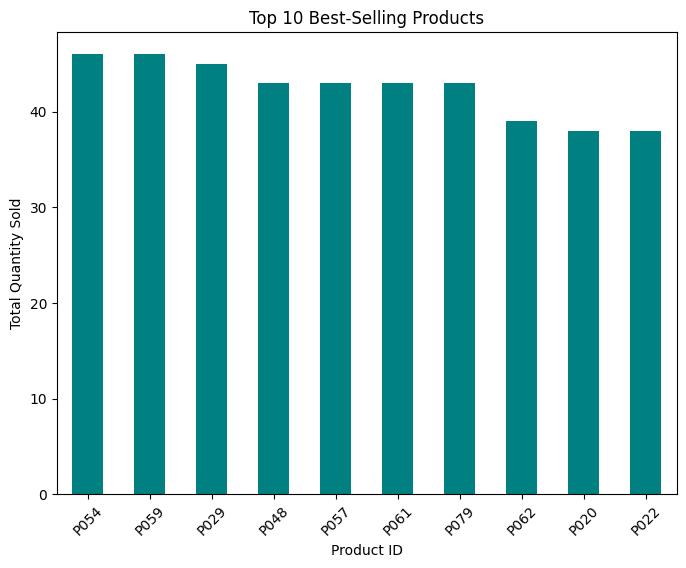

Signup Year Distribution:
 SignupYear
2024    79
2022    64
2023    57
Name: count, dtype: int64
Customer Distribution by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Price Variability by Category:
 Category
Books          153.800135
Clothing       157.965038
Electronics    137.056612
Home Decor     122.236552
Name: Price, dtype: float64
Monthly Sales Summary:
 count       13.000000
mean     53076.581538
std      17909.728454
min       3769.520000
25%      47828.730000
50%      57519.060000
75%      64527.740000
max      71366.390000
Name: TotalValue, dtype: float64
Top 10% of customers contribute 19.11% of the total revenue.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.info())
print(products.info())
print(transactions.info())

print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

transactions = transactions.fillna(0)

region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
signup_trends.plot(kind='bar', color='orange')
plt.title('Customer Signup Trends')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x='Category', y='Price', palette='Set2')
plt.title('Product Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='green')
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid()
plt.show()

top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='red')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

best_selling_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(8, 6))
best_selling_products.plot(kind='bar', color='teal')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Insight 1: Signup trends over time
signup_year_distribution = customers['SignupYear'].value_counts()
print("Signup Year Distribution:\n", signup_year_distribution)

# Insight 2: Regional distribution of customers
print("Customer Distribution by Region:\n", region_counts)

# Insight 3: Product pricing variability
price_variability = products.groupby('Category')['Price'].std()
print("Price Variability by Category:\n", price_variability)

# Insight 4: Monthly sales trends
monthly_sales_summary = monthly_sales.describe()
print("Monthly Sales Summary:\n", monthly_sales_summary)

# Insight 5: Revenue contribution of top customers
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum()
top_10_percent_customers = customer_revenue.nlargest(int(len(customer_revenue) * 0.1)).sum()
total_revenue = customer_revenue.sum()
print(f"Top 10% of customers contribute {top_10_percent_customers / total_revenue:.2%} of the total revenue.")


